In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:

df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
df.head()


,River,W,S,Q,U,H,D50,D84,R,qs
0,Bogardi1,0.300,0.0104,0.02747,1.06,0.087,0.0068,0.00816,0.0721,24.1
1,Bogardi1,0.300,0.0141,0.01566,0.92,0.057,0.0068,0.00816,0.0504,6.1
2,Bogardi1,0.823,0.0143,0.02288,0.69,0.040,0.0068,0.00816,0.0389,0.2
3,Bogardi1,0.823,0.0145,0.04978,0.82,0.074,0.0068,0.00816,0.0709,21.9
4,Bogardi1,0.823,0.0153,0.03582,0.78,0.056,0.0068,0.00816,0.0535,1.8


In [3]:
df.describe()

,W,S,Q,U,H,D50,D84,R,qs
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,0.556500,0.022705,0.113250,0.929871,0.096134,0.006579,0.007895,0.083338,2625.613591
std,0.377787,0.038868,0.500064,0.466911,0.109170,0.008250,0.009899,0.094409,10394.566850
min,0.100000,0.000990,0.000500,0.220000,0.009000,0.000300,0.000360,0.008900,0.000000
25%,0.305000,0.003900,0.013880,0.600000,0.043000,0.001600,0.001920,0.039200,3.400000
50%,0.427000,0.009000,0.026050,0.830000,0.069000,0.003300,0.003960,0.060400,49.600000
75%,0.819000,0.016300,0.055950,1.130000,0.116000,0.009000,0.010800,0.099000,361.000000
max,2.000000,0.200000,4.613810,2.880000,1.092000,0.044300,0.053160,0.917300,103700.000000


In [4]:

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVR

X_ml=df.loc[:, [ 'H','S','Q','D50','D84','R']].values
y_ml=df.loc[:, [ 'qs']].values

from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(X_ml)
X1 = scaler1.transform(X_ml)
scaler2 = MinMaxScaler().fit(y_ml)
y1 = scaler2.transform(y_ml)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
y_train=y_train.ravel()
y_test=y_test.ravel()

svr_rbf = SVR(kernel="rbf", C=2.96770348e+02, gamma='scale', epsilon=0.001)
md=svr_rbf.fit(X_train,y_train)

In [5]:

y_pred_scale = svr_rbf.predict(X_test)
qsb_SVR = scaler2.inverse_transform(y_pred_scale)

ValueError: Expected 2D array, got 1D array instead:
array=[ 5.27863277e-01  2.78435579e-03  1.11924736e-03  6.17666281e-04
  8.74945367e-05  2.29035037e-03 -4.82612172e-04  1.66517192e-03
  6.70608851e-03  1.34374051e-03  4.20314001e-02  1.45063126e-03
  2.07565386e-03  9.97354806e-04  5.02106372e-03  6.21399738e-04
  1.75032969e-01  1.80771165e-03  1.63332513e-02  9.93659659e-04
 -4.34163175e-04  3.36822192e-04  7.13500661e-04  1.70853960e-03
  1.22348225e-03  1.88026006e-03  7.12558668e-02  8.08876729e-04
  2.19863763e-04 -3.76243408e-04  2.24890804e-04  7.72216370e-04
  4.17778021e-04  1.36429072e-03  2.46105774e-03  6.04794436e-04
 -6.76669593e-04  3.07002376e-01  1.55352738e-03  3.63425382e-03
  1.02297897e-03 -2.05292860e-04 -7.00851577e-05  1.06375811e-03
 -4.55228117e-04  6.94346100e-04  1.48150013e-03  1.40029315e-03
  1.01161831e-03 -6.07213037e-02  2.97217769e-03  9.45911882e-04
  2.43612183e-02  8.06504031e-05  1.63115196e-04  6.74325764e-04
  1.08188952e-03  2.29049767e-03 -5.80315015e-05 -9.73390166e-05
  1.76284608e-03 -9.09758464e-04  8.72645929e-04  2.21241525e-03
  5.11511954e-01  2.46740847e-03 -8.05353304e-02  1.28754016e-03
  5.96053653e-02  1.00069518e-03  7.49948454e-01  4.89830696e-03
  8.28557186e-04  9.62752599e-04  5.76498830e-03  3.75597831e-04
  4.64731201e-01  1.55044143e-04  1.45035086e-03  1.99157156e-03
 -3.42828073e-04  3.05340880e-03 -8.99278328e-04  2.57021636e-03
 -3.68007084e-04  2.42914216e-03 -3.27644483e-04  6.01110893e-02
  2.05371564e-05  2.11888483e-03 -7.60758899e-05 -6.39565587e-04
  1.51124732e-03  3.16400667e-01  5.55813705e-03  1.10419436e-02
  1.25351613e-03  4.02081785e-04  8.45038586e-04 -3.83043620e-04
 -5.86276058e-04  5.62058880e-05  6.82245982e-03  2.68919142e-03
 -6.70016846e-04  1.57008138e-04  4.51586860e-04  5.10284179e-03
 -4.76118789e-04  1.64809445e-03  4.49203676e-03  6.43886545e-05
  3.08087761e-01 -4.66627462e-03 -1.36525191e-03  2.88156786e-04
  5.43464238e-04  1.05254735e-03  1.10149580e-03  2.57308433e-04
  3.72217086e-01  6.18948633e-05  1.10148040e-03  3.02796352e-03
  1.96132640e-03  3.51373989e-03  7.66673954e-03  7.64318851e-03
  1.74162781e-04  4.96565909e-03  1.99065000e-03  1.41011778e-03
  1.61732130e-03 -5.07073563e-04  2.77367683e-03  5.86420207e-03
  1.63019817e-03 -5.49113595e-04  3.62241757e-03  1.26455756e-04
  7.70145595e-04  4.35699685e-03 -7.40621209e-04  8.65140638e-02
 -4.48513893e-04  3.39724778e-03  4.63108316e-04  2.68887476e-03
 -2.39234829e-05  1.08493712e-03 -3.63746791e-04  4.24941294e-01
  9.87973425e-05  9.12204168e-01  5.45360134e-04  2.12810914e-03
 -5.76786642e-04 -4.29674972e-04 -9.98499012e-04  1.27462467e-03
  1.33354075e-03  1.22250097e-03  2.39762630e-03  7.20039253e-03
  5.59838260e-04  5.76097462e-04  5.77573158e-03  1.11161430e-03
  6.57394917e-04  1.12089083e-02  2.37064716e-02  1.31301934e-03
 -7.27778903e-05  7.17592470e-04  7.93539608e-04  4.21157750e-03
  1.02601538e-01  2.18805331e-03  2.25610176e-03  8.05409792e-02
 -2.11853567e-04  1.98713715e-03  4.80886210e-04 -5.72522247e-04
  2.31624177e-03 -6.83118517e-02  2.37672173e-03  2.02718482e-03
  1.83437843e-04  5.77206349e-04  7.18645904e-02  2.68856186e-01
  1.01676844e-03  2.11816203e-03  1.32536215e-02  5.13837851e-03
 -2.00285914e-04  2.01452137e-03 -7.40048664e-05  1.75924391e-03
  2.85165669e-03  2.75812433e-03  2.94577045e-03  5.39010507e-03
  2.19019121e-03 -8.65320841e-04  1.09557498e-03  2.29405689e-03
 -8.46182506e-04  1.08542339e-03  2.96719294e-03 -9.99577269e-05
  3.37032072e-03 -4.58241943e-04  6.37055867e-02  1.33778265e-04
 -7.95401091e-04  2.16823153e-03  4.55277973e-04  1.17759587e-02
  1.60205100e-03  1.27087149e-01  3.23988475e-04  7.63099533e-03
  1.70955743e-03  1.95955557e-04  1.47465612e-03  1.32529513e-03
  2.03486248e-01  1.36310039e-03  3.64948111e-04 -6.07908562e-04
  1.62871013e-03  1.70093622e-03  2.73924202e-03 -1.12316360e-03
  2.26213628e-03  1.25071892e-03  5.41879309e-04  2.38895912e-01
  8.84082882e-04  1.06741880e-03 -4.31236014e-04  6.37564860e-04
  7.61445724e-04  8.28711479e-04 -6.45197733e-04 -1.00335499e-03
  7.04674745e-03  3.97081759e-03  1.33611441e-04  2.22006006e-01
  8.83750159e-03  9.46770576e-04  9.34634517e-04 -2.94497234e-04
 -4.75597297e-04  1.26751701e-03  2.34553965e-03  1.33144264e-02
  9.58914177e-04  8.88170897e-02  1.02865960e-03  9.78647702e-04].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

X=df.loc[:, ['D84','D50','H','U','S','R','Q','W']].values
y=df.loc[:, [ 'qs']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
S_t=X_test[:,4]
D90_t=X_test[:,0]
D50_t=X_test[:,1]
h_t=X_test[:,2]
U_t=X_test[:,3 ]
R_t=X_test[:,5 ]
Q_t=X_test[:,6 ]
W_t=X_test[:,7 ]
qsb_Measured=y_test

In [ ]:
rhos = 2650
rho = 1000
g=9.81
v=1.79*10**(-6)
s=rhos/rho
p=0.4

In [ ]:
import math
def wong_parker(D90,D50,S,R,U,W):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    phi=3.97*(ta_str-0.0495)**(3/2)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:

def Recking_2013(D50,h,U,S,R):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    ta_str_m=0.26*S**0.3
    phi=14*(ta_str**2.5)/(1+(ta_str_m/ta_str)**10)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:
def calculate_sediment_bed_load(D90, D50, h, U,W):
    D90=D90
    D50=D50
    r = 3 * D90
    C = 18 * math.log10(12 * h / r)
    C90 = 18 * math.log10(12 * h / D90)
    mu = (C / C90) ** (3 / 2)
    delta = (rhos - rho) / rho
    tac = rho * g * U ** 2 / C ** 2
    qsb = 5 * D50 * U / C * math.sqrt(g) * math.exp(-0.27 * delta * D50 * rho * g / (mu * tac)) # sediment bed load
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:
def rickenmann(D90,D50,S,R,Q,W,U):
    D_coef=1.05
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    q=Q/W
    qc=0.065*(s-1)**1.67*g**0.5*D50**1.5*S**(-1.12)
    if S<0.03:
        qsb=1.5*(q-qc)*S**1.5
    else:
        qsb=12.6*(D_coef)/((s-1)**1.6)*(q-qc)*S**2

    qsb=qsb*(rhos-rho)*g*(1-p)
    return qsb*1000

In [ ]:
def Schoklitsch(D90,D50,S,R,Q,W,U):
    D_coef=1.05
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    q=Q/W
    D40=D50
    qc=0.26*(s-1)**(5/3)*D40**(3/2)/(S**(7/6))
    qsb=2.5/(s)*S**(3/2)*(q-qc)
    qsb=qsb*(rhos-rho)*g*(1-p)
    return qsb*1000

In [ ]:
def smart_jaeggi(D90,D50,S,R,U,W):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    Z90=R/D90
    Udustr=2.5*(1-math.exp(-0.05*Z90/(S**0.5)))*0.5*math.log(8.2*Z90)
    fi=0.61
    D30=D50
    ta_str_c=0.05*math.cos(math.atan(S))*(1-S/(math.tan(fi)))
    phi=4*(D90/D30)**0.2*S**0.6*Udustr*ta_str**0.5*(ta_str-ta_str_c)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:
def vanrijn(D90,D50,S,R,U,W):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    u_str=math.sqrt(g)*U/(18*math.log10(4*R/D90))
    D_str=D50*((s-1)*g/(v**2))**1/3
    if D_str<=4:
        alpha=0.24
        beta=-1
    elif D_str > 4 and D_str <= 10:
        alpha=0.14
        beta=-0.64
    elif D_str > 10 and D_str <= 20:
        alpha=0.04
        beta=-0.1
    elif D_str > 20 and D_str <= 150:
        alpha=0.013
        beta=0.29
    else:
        alpha=0.055
        beta=0   
    u_str_c_2=g*(s-1)*D50*(alpha*D_str**beta)
    T=(u_str**2-u_str_c_2)/(u_str_c_2)
    phi=0.053*(T**2.1/(D_str**0.3))
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:
def wong_parker(D90,D50,S,R,U,W):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    phi=3.97*(ta_str-0.0495)**(3/2)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:
def cemenen_larson(D90,D50, h, U,S):
    ta=rho*g*h*S
    u_str=math.sqrt(ta/rho)
    ta_str=ta/(g*(rhos-rho)*D50)
    D_str=((s-1)*g/(v**2))**(1/3)*D50
    ta_str_c=0.3/(1+1.2*D_str)+0.055*(1-math.exp(-0.02*D_str))
    phi=12*ta_str**(3/2)*math.exp(-4.5*ta_str_c/ta_str)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:
def Einstein_Brown(D50,h,U,S):
    C=U/(math.sqrt(h*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    if ta_str>0.18:
        ft_str=40*ta_str**3
    else:
        ft_str=2.15*math.exp(-0.391/ta_str)

    phi=(math.sqrt(2/3+36*v**2/(g*(s-1)*D50**3)))*ft_str
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)

    return qsb*1000

In [ ]:
def engelund_hansen(D50,h,U,S,R):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    f=2*g*R*S/U**2
    phi=0.1*ta_str**(5/2)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:
def parker(D50,h,U,S,R):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    phi=11.2*((ta_str-0.03)**4.5)/(ta_str**3)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [ ]:
qsb_pred_lec=np.zeros([len(D50_t),1])
qsb_pred_wong_parker=np.zeros([len(D50_t),1])
qsb_pred_Recking=np.zeros([len(D50_t),1])
qsb_pred_rickenmann=np.zeros([len(D50_t),1])
qsb_pred_Schoklitsch=np.zeros([len(D50_t),1])
qsb_pred_smart_jaeggi=np.zeros([len(D50_t),1])
qsb_pred_vanrijn=np.zeros([len(D50_t),1])
qsb_pred_cemenen_larson=np.zeros([len(D50_t),1])
qsb_pred_Einstein_Brown=np.zeros([len(D50_t),1])
qsb_pred_engelund_hansen=np.zeros([len(D50_t),1])
qsb_pred_parker=np.zeros([len(D50_t),1])

In [ ]:

for i in range(len(D50_t)):
    qsb_pred_lec[i]=calculate_sediment_bed_load(D90_t[i], D50_t[i], h_t[i], U_t[i],W_t[i])
    qsb_pred_wong_parker[i]=wong_parker(D90_t[i],D50_t[i],S_t[i],R_t[i],U_t[i],W_t[i])
    qsb_pred_Recking[i]=Recking_2013(D50_t[i], h_t[i], U_t[i],S_t[i],R_t[i])
    qsb_pred_rickenmann[i]=rickenmann(D90_t[i],D50_t[i],S_t[i],R_t[i],Q_t[i],W_t[i],U_t[i])
    qsb_pred_Schoklitsch[i]=Schoklitsch(D90_t[i],D50_t[i],S_t[i],R_t[i],Q_t[i],W_t[i],U_t[i])
    qsb_pred_smart_jaeggi[i]=smart_jaeggi(D90_t[i],D50_t[i],S_t[i],R_t[i],U_t[i],W_t[i])
    qsb_pred_vanrijn[i]=vanrijn(D90_t[i],D50_t[i],S_t[i],R_t[i],U_t[i],W_t[i])
    qsb_pred_cemenen_larson[i]=cemenen_larson(D90_t[i], D50_t[i], h_t[i], U_t[i],S_t[i])
    qsb_pred_Einstein_Brown[i]=Einstein_Brown(D50_t[i], h_t[i], U_t[i],S_t[i])
    qsb_pred_engelund_hansen[i]=engelund_hansen(D50_t[i], h_t[i], U_t[i],S_t[i],R_t[i])
    qsb_pred_parker[i]=parker(D50_t[i], h_t[i], U_t[i],S_t[i],R_t[i])
    
    

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_3200\23202885.py:5: RuntimeWarning: invalid value encountered in double_scalars
  phi=3.97*(ta_str-0.0495)**(3/2)
C:\Users\Mehdi\AppData\Local\Temp\ipykernel_3200\555701395.py:24: RuntimeWarning: invalid value encountered in double_scalars
  phi=0.053*(T**2.1/(D_str**0.3))


In [ ]:
# Converting nan values to 0 for all qsb_pred variables
qsb_pred_lec = np.nan_to_num(qsb_pred_lec, nan=0)
qsb_pred_wong_parker = np.nan_to_num(qsb_pred_wong_parker, nan=0)
qsb_pred_Recking = np.nan_to_num(qsb_pred_Recking, nan=0)
qsb_pred_rickenmann = np.nan_to_num(qsb_pred_rickenmann, nan=0)
qsb_pred_Schoklitsch = np.nan_to_num(qsb_pred_Schoklitsch, nan=0)
qsb_pred_smart_jaeggi = np.nan_to_num(qsb_pred_smart_jaeggi, nan=0)
qsb_pred_vanrijn = np.nan_to_num(qsb_pred_vanrijn, nan=0)
qsb_pred_cemenen_larson = np.nan_to_num(qsb_pred_cemenen_larson, nan=0)
qsb_pred_Einstein_Brown = np.nan_to_num(qsb_pred_Einstein_Brown, nan=0)
qsb_pred_engelund_hansen = np.nan_to_num(qsb_pred_engelund_hansen, nan=0)
qsb_pred_parker = np.nan_to_num(qsb_pred_parker, nan=0)

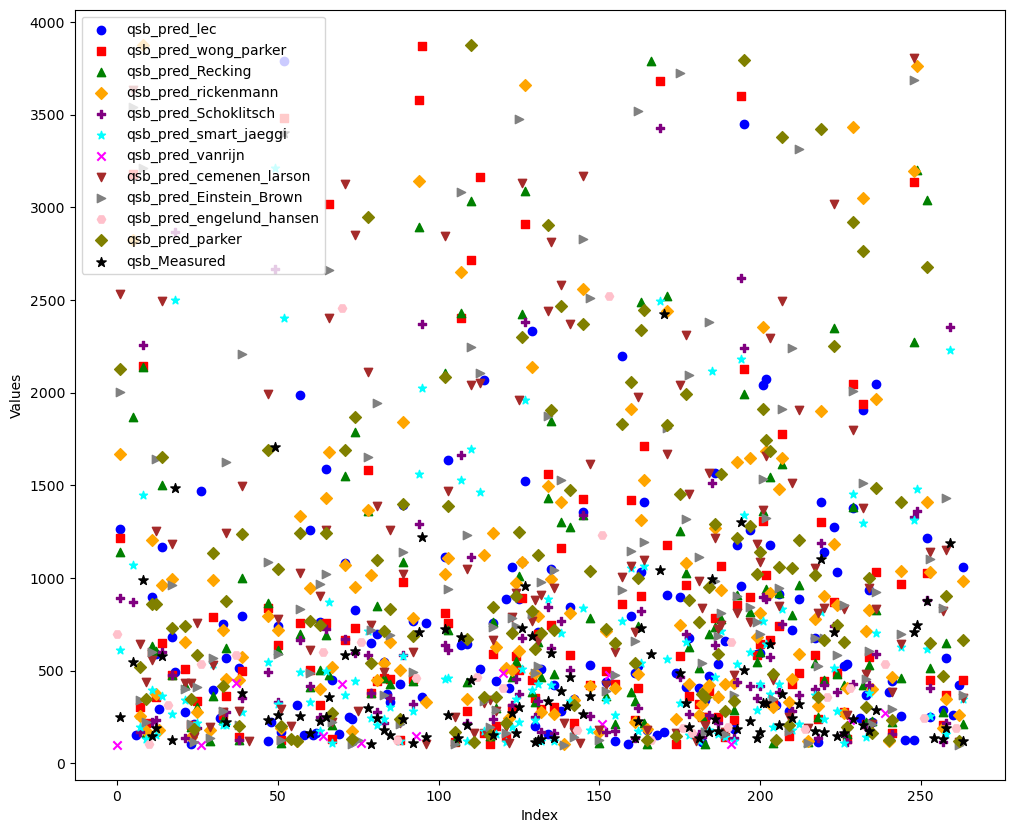

In [ ]:

upper_range=4000
lower_range=100

# Set the figure size for a larger plot window
plt.figure(figsize=(12, 10))  # Adjust the values as needed for your desired size

plt.scatter(range(len(D90_t)), np.where((qsb_pred_lec >= lower_range) & (qsb_pred_lec <= upper_range), qsb_pred_lec, np.nan), c='blue', marker='o', label='qsb_pred_lec')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_wong_parker >= lower_range) & (qsb_pred_wong_parker <= upper_range), qsb_pred_wong_parker, np.nan), c='red', marker='s', label='qsb_pred_wong_parker')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_Recking >= lower_range) & (qsb_pred_Recking <= upper_range), qsb_pred_Recking, np.nan), c='green', marker='^', label='qsb_pred_Recking')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_rickenmann >= lower_range) & (qsb_pred_rickenmann <= upper_range), qsb_pred_rickenmann, np.nan), c='orange', marker='D', label='qsb_pred_rickenmann')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_Schoklitsch >= lower_range) & (qsb_pred_Schoklitsch <= upper_range), qsb_pred_Schoklitsch, np.nan), c='purple', marker='P', label='qsb_pred_Schoklitsch')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_smart_jaeggi >= lower_range) & (qsb_pred_smart_jaeggi <= upper_range), qsb_pred_smart_jaeggi, np.nan), c='cyan', marker='*', label='qsb_pred_smart_jaeggi')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_vanrijn >= lower_range) & (qsb_pred_vanrijn <= upper_range), qsb_pred_vanrijn, np.nan), c='magenta', marker='x', label='qsb_pred_vanrijn')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_cemenen_larson >= lower_range) & (qsb_pred_cemenen_larson <= upper_range), qsb_pred_cemenen_larson, np.nan), c='brown', marker='v', label='qsb_pred_cemenen_larson')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_Einstein_Brown >= lower_range) & (qsb_pred_Einstein_Brown <= upper_range), qsb_pred_Einstein_Brown, np.nan), c='gray', marker='>', label='qsb_pred_Einstein_Brown')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_engelund_hansen >= lower_range) & (qsb_pred_engelund_hansen <= upper_range), qsb_pred_engelund_hansen, np.nan), c='pink', marker='H', label='qsb_pred_engelund_hansen')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_parker >= lower_range) & (qsb_pred_parker <= upper_range), qsb_pred_parker, np.nan), c='olive', marker='D', label='qsb_pred_parker')
plt.scatter(range(len(D90_t)), np.where((qsb_Measured >= lower_range) & (qsb_Measured <= upper_range), qsb_Measured, np.nan), c='black', marker='*', label='qsb_Measured', s=50)  # Increase the marker size (s) to 50 or as desired

# Adding labels and legends
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

def error(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    return r_squared,rmse,mae,mse

